# Group proposal
## Introduction
Good sleep improves brain performance, mood, and overall health (Wein, 2022). Many people suffer from inadequate sleep and poor sleep quality. If individuals don't regularly get enough quality sleep, the risk of developing various diseases and disorders is likely to increase. Additionally, studies have shown that exercise can enhance sleep quality. Therefore, we aim to investigate the relationship between sleep duration, exercise levels, and sleep quality, and determine if it's possible to predict sleep quality based on sleep duration and exercise level.

### Question: 
"How are sleep duration and physical activity level related to the quality of sleep and can we predict the quality of sleep by them?"

### Variables: 
The columns of the dataset we would use to analyze are shown below. 
sleep_duration: The number of hours the person sleeps per day.
physical_activity_level (minutes/day): The number of minutes the person engages in physical activity daily.
sleep_quality (scale: 1-10): A subjective rating of the quality of sleep, ranging from 1 to 10.
	Other columns that are included in the dataset are ID, gender, age, occupation,stress_level,bmi_category, blood_pressure, heart_rate,daily_steps, Sleep Disorder.

## Exploratory Analysis

In [60]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
sleep_data <- read_csv("data/sleep_quality.csv", skip = 1, col_names = FALSE)|>
    rename(ID = X1) |>
    rename(gender = X2) |>
    rename(age = X3) |>
    rename(occupation = X4) |>
    rename(sleep_duration = X5) |>
    rename(sleep_quality = X6) |>
    rename(physical_activity_level = X7) |>
    rename(stress_level = X8) |>
    rename(bmi_category = X9) |>
    rename(blood_pressure = X10) |>
    rename(heart_rate = X11) |>
    rename(daily_steps = X12) |>
    rename(sleep_disorder = X13)
sleep_data 

Rows: 374 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): X2, X4, X9, X10, X13
dbl (8): X1, X3, X5, X6, X7, X8, X11, X12

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


ID,gender,age,occupation,sleep_duration,sleep_quality,physical_activity_level,stress_level,bmi_category,blood_pressure,heart_rate,daily_steps,sleep_disorder
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
374,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [62]:
sleep_split <- initial_split(sleep_data, prop = 0.75, strata = sleep_quality)
sleep_training <- training(sleep_split)   
sleep_testing <- testing(sleep_split)

sleep_training
sleep_testing

sleep_summary <- sleep_training |>
    group_by(sleep_disorder) |>
    summarise(average_sleep = mean(sleep_duration), average_physical_activity = mean (physical_activity_level))
sleep_summary

ID,gender,age,occupation,sleep_duration,sleep_quality,physical_activity_level,stress_level,bmi_category,blood_pressure,heart_rate,daily_steps,sleep_disorder
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
374,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


ID,gender,age,occupation,sleep_duration,sleep_quality,physical_activity_level,stress_level,bmi_category,blood_pressure,heart_rate,daily_steps,sleep_disorder
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
367,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
369,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


sleep_disorder,average_sleep,average_physical_activity
<chr>,<dbl>,<dbl>
Insomnia,6.583871,46.37097
None,7.379268,57.17073
Sleep Apnea,7.015385,73.63462


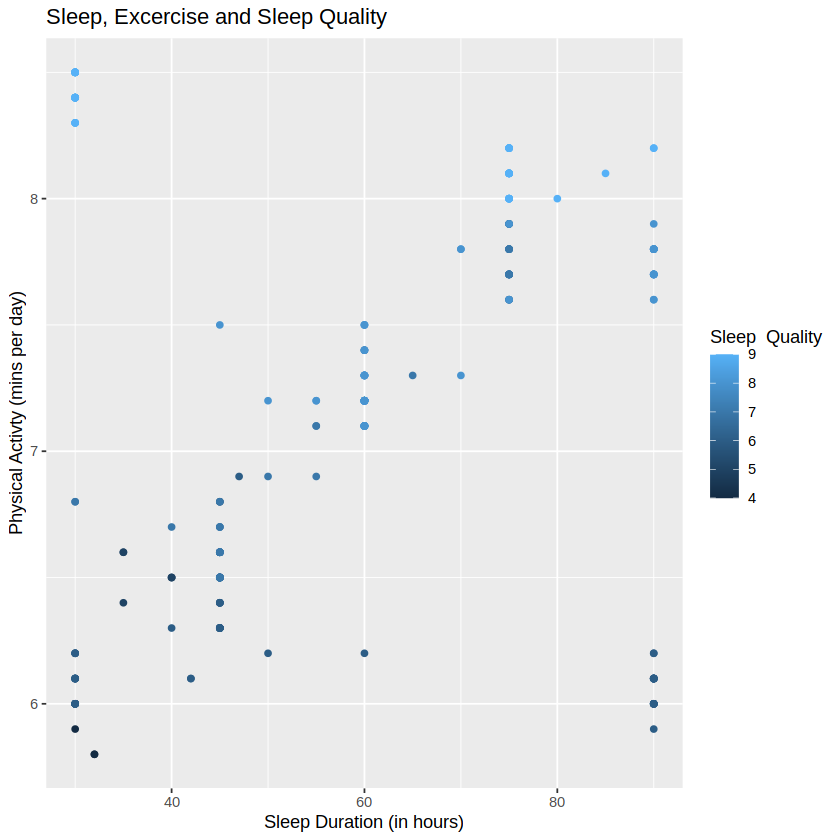

In [64]:
sleep_quality_plot <- sleep_training |>
    ggplot(aes(x = physical_activity_level, y = sleep_duration, color = sleep_quality)) +
    geom_point() +
    labs(x= "Sleep Duration (in hours)", y = "Physical Activty (mins per day)", 
         color = "Sleep  Quality", title = "Sleep, Excercise and Sleep Quality")
sleep_quality_plot

## Methods
We will use the K-nearest neighbor classification algorithm to conduct our data analysis. We plan on using the columns “sleep duration” and “physical level of activity” to predict sleep quality. When doing our K-nearest neighbor classification, we will first split our data into a training, and a testing set. The training data set is then used to build and tune the classifier. The number of neighbors in K-NN is selected by doing a cross-validation and then choosing the number of neighbors with the highest estimated accuracy. Lastly, the test set is used to evaluate the classifier’s estimated accuracy using the predict function. 
We will visualize the results in a scatterplot with hours of sleep on the x-axis and physical activity level on the y-axis. Additionally, we will color the different points based on the class of the observation. In this way, it will be possible to see how the points are distributed, and if there is an overall relationship between class and the predictors. 

## Methods Expected Outcomes and Significance
We aim to develop a predictive classifier that can categorize data into specific levels of sleep quality based on information such as 'sleep duration' and 'physical activity level.' This tool will enable individuals to easily predict their sleep quality and understand the significance of physical activity in relation to their sleep.
However, it also leads to a few questions about whether these two variables would be the best choice to predict sleep quality and whether more variables would be included. Within the dataset we are analyzing, stress level and aging could be two significant factors that influence sleep quality. The short-term insomnia would be caused by mental stress. According to certain studies, about half of aging people report they suffer from sleep disorders. Without taking those into consideration, the classifier would lack accuracy.